# Integrando los cortes del Esferoide N˚3
Vamos a integrar la información de los tres cortes (1, 2 y 3) de Sph3, usando los `DataFrames` obtenidos con `pipeline_sph3.ipynb`.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial import KDTree
from scipy.spatial import Voronoi, voronoi_plot_2d


## Procesamiento individual de los `DataFrames`

Los leemos, les agregamos la columna `slice` con el valor correspondiente y la volvemos de tipo `'category'`, lo cual ahorra bastante memoria (porque es una variable que puede tomar un número reducido de valores discretos).

In [2]:
# Read the previously saved DataFrame for slice 1

z_slice = 1

# Define the directory path
directory = f"./results/sph3/slice_{z_slice}/"
csv_file_path = os.path.join(directory, f"sph3_slice_{z_slice}.csv")

# Read the CSV file into a DataFrame
df1 = pd.read_csv(csv_file_path)
df1['slice'] = z_slice
df1['slice'] = df1['slice'].astype('category')
df1

,label,area,centroid-0,centroid-1,equivalent_diameter,bbox_area,convex_area,filled_area,major_axis_length,minor_axis_length,...,feret_diameter_max,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,Fluorescence_Intensity,filtered_GMM_stemness,slice
0,1,4921.0,1443.600691,1694.145092,79.155618,7326.0,5060.0,4921.0,93.194983,68.856923,...,99.408249,0.359879,0.239532,0.074456,0.064103,274.048773,0.972530,0.566690,0.0,1
1,2,2026.0,1124.039980,1513.043435,50.789599,2652.0,2063.0,2026.0,52.505226,49.319019,...,54.120237,0.470907,0.367563,0.068463,-0.714845,166.267027,0.982065,1.889052,0.0,1
2,3,3359.0,1612.309914,1332.499256,65.397337,4440.0,3426.0,3359.0,73.005350,59.233537,...,76.243032,0.535341,0.284288,0.082065,1.333332,220.651804,0.980444,18.248936,1.0,1
3,4,4604.0,1380.533666,991.077541,76.563665,6364.0,4678.0,4604.0,87.789028,67.280105,...,88.022724,0.353910,0.275671,0.067260,0.423407,257.421356,0.984181,3.140459,0.0,1
4,5,3932.0,1483.042472,1755.537640,70.755762,5698.0,4013.0,3932.0,82.448405,62.871111,...,84.905830,0.441935,0.368543,0.135607,-0.948238,245.865007,0.979816,69.363348,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,5416.0,1867.262740,1743.097674,83.041347,6776.0,5485.0,5416.0,91.880270,75.207813,...,94.667840,0.113058,0.069806,0.027960,-0.440858,273.865007,0.987420,0.000000,0.0,1
68,69,4168.0,1477.769674,555.488004,72.848215,6141.0,4653.0,4168.0,89.212470,62.998340,...,102.083299,0.262337,0.177082,0.070864,-0.860577,272.338095,0.895766,39.622698,1.0,1
69,70,2658.0,1375.580135,1699.337472,58.174485,4582.0,3428.0,2658.0,67.122572,58.878792,...,82.006097,0.291403,0.174307,0.071245,0.308203,256.971609,0.775379,0.622217,0.0,1
70,71,994.0,1586.582495,1700.585513,35.575274,2000.0,1314.0,994.0,49.106134,31.960734,...,51.419841,0.425567,0.263472,0.129331,0.502364,150.503571,0.756469,0.312291,0.0,1


In [3]:
# df1.info(verbose=True, max_cols=50)

In [3]:
# Read the previously saved DataFrame for slice 2

z_slice = 2

# Define the directory path
directory = f"./results/sph3/slice_{z_slice}/"
csv_file_path = os.path.join(directory, f"sph3_slice_{z_slice}.csv")

# Read the CSV file into a DataFrame
df2 = pd.read_csv(csv_file_path)
df2['slice'] = z_slice
df2['slice'] = df2['slice'].astype('category')
df2

,label,area,centroid-0,centroid-1,equivalent_diameter,bbox_area,convex_area,filled_area,major_axis_length,minor_axis_length,...,feret_diameter_max,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,Fluorescence_Intensity,filtered_GMM_stemness,slice
0,1,3444.0,1570.683798,1918.801684,66.219612,4352.0,3499.0,3444.0,69.453019,63.193160,...,70.837843,0.289804,0.177540,0.033888,-1.312897,217.823376,0.984281,0.000000,0.0,2
1,2,3507.0,516.519247,1570.528087,66.822534,4884.0,3569.0,3507.0,74.656093,60.664088,...,75.312682,0.249331,0.168160,0.045294,0.400760,225.036580,0.982628,79.564630,1.0,2
2,3,5052.0,1598.255938,733.885788,80.202283,7500.0,5239.0,5052.0,95.873433,69.145150,...,101.607086,0.447563,0.345562,0.132322,0.324102,282.149278,0.964306,9.055085,0.0,2
3,4,4269.0,1471.081284,706.701101,73.725570,5696.0,4329.0,4269.0,89.651361,61.067679,...,90.426766,0.459272,0.349566,0.092817,-1.334137,249.865007,0.986140,12.335714,0.0,2
4,5,5734.0,761.251831,1114.486920,85.444459,7566.0,5828.0,5734.0,103.724724,70.893275,...,103.730420,0.410636,0.316923,0.128420,0.407053,292.107648,0.983871,16.575120,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,486.0,1600.434156,1567.652263,24.875579,1280.0,663.0,486.0,50.443236,14.946632,...,47.201695,0.622696,0.486285,0.338171,1.026867,114.361436,0.733032,63.879210,1.0,2
177,178,4385.0,928.021437,322.548689,74.720515,5840.0,4456.0,4385.0,88.620178,63.327659,...,90.271812,0.103644,0.069259,0.024972,-0.634415,251.622366,0.984066,324.147089,1.0,2
178,179,2099.0,1603.924250,1755.281086,51.696516,3760.0,2722.0,2099.0,70.300786,44.327009,...,80.224684,0.531423,0.322004,0.124169,1.348801,238.101551,0.771124,0.894270,0.0,2
179,180,7117.0,1281.226359,628.315582,95.192677,9408.0,7325.0,7117.0,107.277969,87.816624,...,114.109596,0.474659,0.244029,0.041963,-0.893307,331.178716,0.971604,6.718669,0.0,2


In [4]:
# Read the previously saved DataFrame for slice 3

z_slice = 3

# Define the directory path
directory = f"./results/sph3/slice_{z_slice}/"
csv_file_path = os.path.join(directory, f"sph3_slice_{z_slice}.csv")

# Read the CSV file into a DataFrame
df3 = pd.read_csv(csv_file_path)
df3['slice'] = z_slice
df3['slice'] = df3['slice'].astype('category')
df3

,label,area,centroid-0,centroid-1,equivalent_diameter,bbox_area,convex_area,filled_area,major_axis_length,minor_axis_length,...,feret_diameter_max,max_intensity,mean_intensity,min_intensity,orientation,perimeter,solidity,Fluorescence_Intensity,filtered_GMM_stemness,slice
0,1,2424.0,863.791254,1337.980611,55.554772,3264.0,2493.0,2424.0,62.801452,49.682495,...,68.007353,0.554561,0.364733,0.125560,-1.293170,189.681241,0.972323,95.098718,1.0,3
1,2,4103.0,544.851085,1630.333171,72.277949,5928.0,4187.0,4103.0,76.520399,69.716008,...,80.777472,0.529870,0.308730,0.010985,0.872736,244.835570,0.979938,111.228794,1.0,3
2,3,5594.0,904.394351,724.120307,84.394917,8010.0,5678.0,5594.0,95.878007,75.285200,...,97.493590,0.533490,0.387348,0.204637,0.783503,286.048773,0.985206,120.691035,1.0,3
3,4,3766.0,514.913436,1566.904673,69.246084,4977.0,3829.0,3766.0,78.675904,61.264194,...,80.062476,0.590757,0.487347,0.189371,0.170938,230.793939,0.983547,41.050202,0.0,3
4,5,5159.0,1602.937585,727.451832,81.047164,7315.0,5261.0,5159.0,102.917995,64.685345,...,100.846418,0.654721,0.436534,0.141927,1.092534,280.835570,0.980612,129.332494,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,290,948.0,1302.042194,376.554852,34.742353,1375.0,997.0,948.0,56.048792,22.132906,...,56.089215,0.335614,0.199501,0.107776,-0.120110,135.497475,0.950853,14.362966,0.0,3
290,291,1734.0,534.030565,1516.595156,46.987204,2548.0,1801.0,1734.0,60.141441,37.370500,...,63.600314,0.573921,0.432342,0.238204,0.751613,165.781746,0.962798,85.674922,1.0,3
291,292,2135.0,1593.316159,633.011241,52.137956,5548.0,3093.0,2135.0,89.150486,38.107112,...,96.260064,0.624457,0.461804,0.147753,0.607866,254.764502,0.690268,51.473365,0.0,3
292,293,526.0,858.899240,1254.066540,25.879026,756.0,549.0,526.0,28.848267,23.685529,...,29.732137,0.666808,0.515826,0.285976,-0.814744,86.083261,0.958106,75.752873,0.0,3


## `DataFrame` conjunto
Concatenamos los dataframes, creamos una columna nueva `3d_segmentation_label` donde tomando los objetos del corte 2 como referencia, identificamos los más cercanos en los cortes 1 y 3. Luego, para el corte de referencia (el 2) calculamos `total_fluorescence` como la suma de `Fluorescence_Intensity` en los objetos con el mismo `3d_segmentation_label`.

In [25]:
# Concatenate the dataframes
df_all = pd.concat([df1, df2, df3], ignore_index=True)

# Extract centroids and labels for slice 2
centroids_slice_2 = df_all.loc[df_all['slice'] == 2, ['centroid-0', 'centroid-1']].values
labels_slice_2 = df_all.loc[df_all['slice'] == 2, 'label'].values

# Build a KDTree for efficient nearest neighbor search for slice 2
kdtree = cKDTree(centroids_slice_2)

# Function to find nearest label in slice 2
def find_nearest_label(row, tree, labels):
    if row['slice'] == 2:
        return row['label']
    else:
        dist, idx = tree.query([row['centroid-0'], row['centroid-1']], k=1)
        return labels[idx]

# Apply the function to compute the '3d_segmentation_label' column
df_all['3d_segmentation_label'] = df_all.apply(find_nearest_label, axis=1, tree=kdtree, labels=labels_slice_2)

# Now let's sum the fluorescence intensities for each 3d_segmentation_label
# We calculate the sum for each unique label in slice 2
fluorescence_sum = df_all.groupby('3d_segmentation_label')['Fluorescence_Intensity'].sum().to_dict()

# We then map the summed fluorescence back to the slice 2 objects
df_all.loc[df_all['slice'] == 2, 'total_fluorescence'] = df_all.loc[df_all['slice'] == 2, '3d_segmentation_label'].map(fluorescence_sum)

# If you want to create a sub-dataframe for slice=2 with the new 'total_fluorescence' column:
slice_2_sub_df = df_all[df_all['slice'] == 2].copy()



,label,area,centroid-0,centroid-1,equivalent_diameter,bbox_area,convex_area,filled_area,major_axis_length,minor_axis_length,...,mean_intensity,min_intensity,orientation,perimeter,solidity,Fluorescence_Intensity,filtered_GMM_stemness,slice,3d_segmentation_label,total_fluorescence
72,1,3444.0,1570.683798,1918.801684,66.219612,4352.0,3499.0,3444.0,69.453019,63.193160,...,0.177540,0.033888,-1.312897,217.823376,0.984281,0.000000,0.0,2,1,223.830014
73,2,3507.0,516.519247,1570.528087,66.822534,4884.0,3569.0,3507.0,74.656093,60.664088,...,0.168160,0.045294,0.400760,225.036580,0.982628,79.564630,1.0,2,2,353.372930
74,3,5052.0,1598.255938,733.885788,80.202283,7500.0,5239.0,5052.0,95.873433,69.145150,...,0.345562,0.132322,0.324102,282.149278,0.964306,9.055085,0.0,2,3,183.537392
75,4,4269.0,1471.081284,706.701101,73.725570,5696.0,4329.0,4269.0,89.651361,61.067679,...,0.349566,0.092817,-1.334137,249.865007,0.986140,12.335714,0.0,2,4,282.781773
76,5,5734.0,761.251831,1114.486920,85.444459,7566.0,5828.0,5734.0,103.724724,70.893275,...,0.316923,0.128420,0.407053,292.107648,0.983871,16.575120,1.0,2,5,176.143412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,177,486.0,1600.434156,1567.652263,24.875579,1280.0,663.0,486.0,50.443236,14.946632,...,0.486285,0.338171,1.026867,114.361436,0.733032,63.879210,1.0,2,177,63.879210
249,178,4385.0,928.021437,322.548689,74.720515,5840.0,4456.0,4385.0,88.620178,63.327659,...,0.069259,0.024972,-0.634415,251.622366,0.984066,324.147089,1.0,2,178,475.859304
250,179,2099.0,1603.924250,1755.281086,51.696516,3760.0,2722.0,2099.0,70.300786,44.327009,...,0.322004,0.124169,1.348801,238.101551,0.771124,0.894270,0.0,2,179,0.894270
251,180,7117.0,1281.226359,628.315582,95.192677,9408.0,7325.0,7117.0,107.277969,87.816624,...,0.244029,0.041963,-0.893307,331.178716,0.971604,6.718669,0.0,2,180,175.281651


In [27]:
df_all.info(verbose=True, max_cols=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   label                   547 non-null    int64  
 1   area                    547 non-null    float64
 2   centroid-0              547 non-null    float64
 3   centroid-1              547 non-null    float64
 4   equivalent_diameter     547 non-null    float64
 5   bbox_area               547 non-null    float64
 6   convex_area             547 non-null    float64
 7   filled_area             547 non-null    float64
 8   major_axis_length       547 non-null    float64
 9   minor_axis_length       547 non-null    float64
 10  bbox-0                  547 non-null    int64  
 11  bbox-1                  547 non-null    int64  
 12  bbox-2                  547 non-null    int64  
 13  bbox-3                  547 non-null    int64  
 14  weighted_centroid-0     547 non-null    fl

In [28]:
slice_2_sub_df.head()

,label,area,centroid-0,centroid-1,equivalent_diameter,bbox_area,convex_area,filled_area,major_axis_length,minor_axis_length,...,mean_intensity,min_intensity,orientation,perimeter,solidity,Fluorescence_Intensity,filtered_GMM_stemness,slice,3d_segmentation_label,total_fluorescence
72,1,3444.0,1570.683798,1918.801684,66.219612,4352.0,3499.0,3444.0,69.453019,63.193160,...,0.177540,0.033888,-1.312897,217.823376,0.984281,0.000000,0.0,2,1,223.830014
73,2,3507.0,516.519247,1570.528087,66.822534,4884.0,3569.0,3507.0,74.656093,60.664088,...,0.168160,0.045294,0.400760,225.036580,0.982628,79.564630,1.0,2,2,353.372930
74,3,5052.0,1598.255938,733.885788,80.202283,7500.0,5239.0,5052.0,95.873433,69.145150,...,0.345562,0.132322,0.324102,282.149278,0.964306,9.055085,0.0,2,3,183.537392
75,4,4269.0,1471.081284,706.701101,73.725570,5696.0,4329.0,4269.0,89.651361,61.067679,...,0.349566,0.092817,-1.334137,249.865007,0.986140,12.335714,0.0,2,4,282.781773
76,5,5734.0,761.251831,1114.486920,85.444459,7566.0,5828.0,5734.0,103.724724,70.893275,...,0.316923,0.128420,0.407053,292.107648,0.983871,16.575120,1.0,2,5,176.143412


Hagamos una visualización de los Voronoi superpuestos.

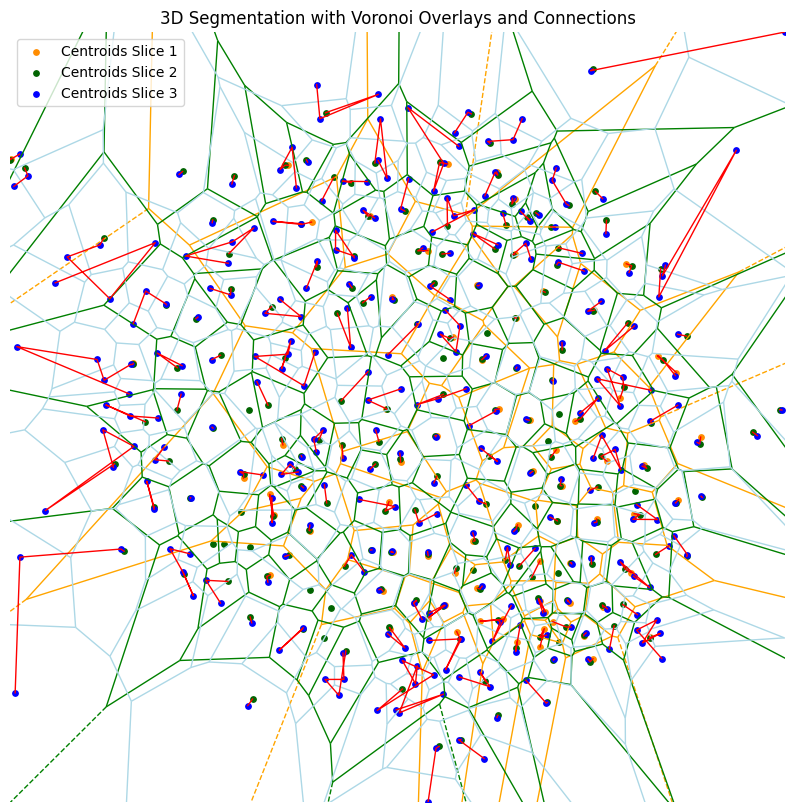

In [34]:
# Function to plot the Voronoi diagram and centroids for a given slice
def plot_voronoi_and_centroids(df_slice, ax, voronoi_color, centroid_color):
    # Extract the centroids
    centroids = df_slice[['centroid-0', 'centroid-1']].to_numpy()
    # Construct and plot the Voronoi diagram
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors=voronoi_color, line_width=1)
    # Plot the centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], color=centroid_color, s=15, label=f'Centroids Slice {df_slice["slice"].iloc[0]}')

# Start the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Voronoi and centroids for each slice with the specified colors
plot_voronoi_and_centroids(df_all[df_all['slice'] == 1], ax, 'orange', 'darkorange')
plot_voronoi_and_centroids(df_all[df_all['slice'] == 2], ax, 'green', 'darkgreen')
plot_voronoi_and_centroids(df_all[df_all['slice'] == 3], ax, 'lightblue', 'blue')

# Draw lines connecting centroids with the same '3d_segmentation_label'
for label in df_all['3d_segmentation_label'].unique():
    # Get all centroids with the same 3d_segmentation_label
    centroids = df_all[df_all['3d_segmentation_label'] == label][['centroid-0', 'centroid-1', 'slice']]
    if len(centroids['slice'].unique()) < 2:
        # Skip labels that are not in multiple slices
        continue
    
    # Sort centroids by slice to connect them in order
    centroids = centroids.sort_values('slice')
    ax.plot(centroids['centroid-0'], centroids['centroid-1'], color='red', linestyle='-', linewidth=1)

# Set axis limits to encompass all centroids
all_centroids = df_all[['centroid-0', 'centroid-1']].to_numpy()
ax.set_xlim(all_centroids[:, 0].min(), all_centroids[:, 0].max())
ax.set_ylim(all_centroids[:, 1].max(), all_centroids[:, 1].min())  # Inverted y-axis

# Set title and remove axes
ax.set_title('3D Segmentation with Voronoi Overlays and Connections')
plt.axis('off')
ax.legend()  # Add legend for centroids

# Show the plot
plt.show()



Este resultado es bastante choto. Quizás se deba a que las células de los cortes 1 y 2 están asociadas, e.g. a más de una del corte 3. 

In [33]:
df_all[['label', 'slice', '3d_segmentation_label', 'total_fluorescence']].loc[df_all['3d_segmentation_label'] == 48].head(10)

,label,slice,3d_segmentation_label,total_fluorescence
0,1,1,48,NaN
69,70,1,48,NaN
119,48,2,48,300.34831
399,147,3,48,NaN
482,230,3,48,NaN
534,282,3,48,NaN


Exactamente lo que pensaba, tenemos un objeto 3D formado por dos objetos del corte 1, uno del 2, y tres del 3. Para solucionar esto tenemos que primero hacer el loop sobre los objetos del corte 1 y a cada uno asignarle un objeto en el corte 2. Luego iteramos sobre el corte 2, asignando un objeto del corte 3.

In [20]:
# Function to assign nearest labels from source slice to target slice
def assign_nearest_labels(source_df, target_df):
    source_centroids = source_df[['centroid-0', 'centroid-1']].values
    target_centroids = target_df[['centroid-0', 'centroid-1']].values
    target_labels = target_df['label'].values

    # Build a KDTree for efficient nearest neighbor search in the target slice
    kdtree = KDTree(target_centroids)

    # Find nearest target label for each source object
    nearest_labels = []
    for centroid in source_centroids:
        dist, idx = kdtree.query(centroid, k=1)
        nearest_labels.append(target_labels[idx])

    return nearest_labels

# Assign nearest labels from slice 1 to slice 2
nearest_labels_1_to_2 = assign_nearest_labels(df1, df2)
df1['3d_segmentation_label'] = nearest_labels_1_to_2

# Assign nearest labels from slice 2 to slice 3
nearest_labels_2_to_3 = assign_nearest_labels(df2, df3)
df2['3d_segmentation_label'] = nearest_labels_2_to_3

# Now concatenate the dataframes
df_all = pd.concat([df1, df2, df3], ignore_index=True)


In [12]:
df_all[['label', 'slice', '3d_segmentation_label']].head()

,label,slice,3d_segmentation_label
0,1,1,48.0
1,2,1,7.0
2,3,1,137.0
3,4,1,29.0
4,5,1,112.0


In [14]:
df_all[['label', 'slice', '3d_segmentation_label']].loc[df_all['3d_segmentation_label'] == 48].head(10) # , 'total_fluorescence'

,label,slice,3d_segmentation_label
0,1,1,48.0
69,70,1,48.0
133,62,2,48.0


De nuevo tenemos más de un objeto del mismo slice, en el mismo grupo de `'3d_segmentation_label'`. Esto pasa porque al iterar sobre el primer slice, hay objetos del slice 2 que son el más cercano para más de un objeto del slice 1.

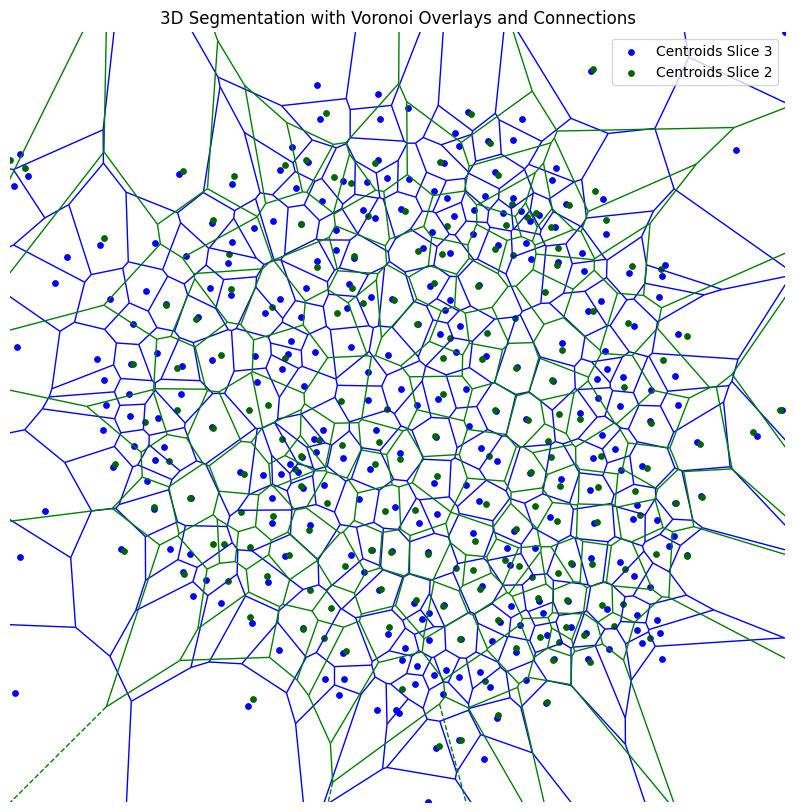

In [26]:
# Function to plot the Voronoi diagram and centroids for a given slice
def plot_voronoi_and_centroids(df_slice, ax, voronoi_color, centroid_color):
    # Extract the centroids
    centroids = df_slice[['centroid-0', 'centroid-1']].to_numpy()
    # Construct and plot the Voronoi diagram
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors=voronoi_color, line_width=1)
    # Plot the centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], color=centroid_color, s=15, label=f'Centroids Slice {df_slice["slice"].iloc[0]}')

# Start the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Voronoi and centroids for each slice with the specified colors
# plot_voronoi_and_centroids(df_all[df_all['slice'] == 1], ax, 'orange', 'darkorange')
plot_voronoi_and_centroids(df_all[df_all['slice'] == 3], ax, 'blue', 'blue')

plot_voronoi_and_centroids(df_all[df_all['slice'] == 2], ax, 'green', 'darkgreen')

# # Draw lines connecting centroids with the same '3d_segmentation_label'
# for label in df_all['3d_segmentation_label'].dropna().unique():
#     # Get all centroids with the same 3d_segmentation_label
#     centroids = df_all[df_all['3d_segmentation_label'] == label][['centroid-0', 'centroid-1', 'slice']]
#     if len(centroids['slice'].unique()) < 2:
#         # Skip labels that are not in multiple slices or have NaN values
#         continue

#     # Sort centroids by slice to connect them in order
#     centroids = centroids.sort_values('slice')
#     ax.plot(centroids['centroid-0'], centroids['centroid-1'], color='red', linestyle='-', linewidth=1)

# Set axis limits to encompass all centroids
all_centroids = df_all[['centroid-0', 'centroid-1']].to_numpy()
ax.set_xlim(all_centroids[:, 0].min(), all_centroids[:, 0].max())
ax.set_ylim(all_centroids[:, 1].max(), all_centroids[:, 1].min())  # Inverted y-axis

# Set title and remove axes
ax.set_title('3D Segmentation with Voronoi Overlays and Connections')
plt.axis('off')
ax.legend()  # Add legend for centroids

# Show the plot
plt.show()


In [31]:
n_1 = df_all[['label', 'slice', '3d_segmentation_label']].loc[df_all['slice'] == 1].shape[0]
n_2 = df_all[['label', 'slice', '3d_segmentation_label']].loc[df_all['slice'] == 2].shape[0]
n_3 = df_all[['label', 'slice', '3d_segmentation_label']].loc[df_all['slice'] == 3].shape[0]
print(f"Number of objects in slice 1: {n_1}")
print(f"Number of objects in slice 2: {n_2}")
print(f"Number of objects in slice 3: {n_3}")
print(f'new cells {n_3-n_2}')


Number of objects in slice 1: 72
Number of objects in slice 2: 181
Number of objects in slice 3: 294
new cells 113


Acá

In [17]:
df_all.columns

Index(['label', 'area', 'centroid-0', 'centroid-1', 'equivalent_diameter',
       'bbox_area', 'convex_area', 'filled_area', 'major_axis_length',
       'minor_axis_length', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3',
       'weighted_centroid-0', 'weighted_centroid-1', 'coords', 'eccentricity',
       'euler_number', 'extent', 'feret_diameter_max', 'max_intensity',
       'mean_intensity', 'min_intensity', 'orientation', 'perimeter',
       'solidity', 'Fluorescence_Intensity', 'filtered_GMM_stemness', 'slice',
       '3d_segmentation_label'],
      dtype='object')

Median cell diameter: 159.15 pixels


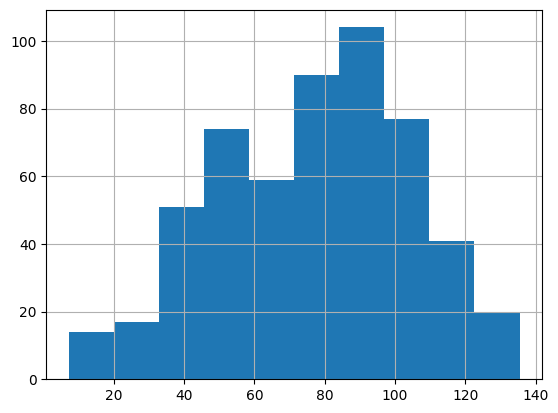

In [13]:
# Maybe we should try assigning a distance_upper_bound to the KDTree query.
# It should be a factor times a typical cell diameter. Let's try 1.5 times the median cell diameter.
median_cell_diameter = df_all['equivalent_diameter'].median() * 2
print(f"Median cell diameter: {median_cell_diameter:.2f} pixels")
# Let's also plot the histogram of cell diameters
df_all['equivalent_diameter'].hist() # bins=50
plt.show()

In [53]:
def assign_unique_nearest_labels(source_df, target_df):
    source_centroids = source_df[['centroid-1', 'centroid-0']].values
    target_centroids = target_df[['centroid-1', 'centroid-0']].values
    target_labels = target_df['label'].values

    # Build a KDTree for the target centroids
    kdtree = KDTree(target_centroids)

    # Dictionary to keep track of which target labels have been assigned
    assigned_targets = set()

    # Function to find the unique nearest neighbor
    def find_unique_nearest(centroid):
        indices = kdtree.query(centroid, k=len(target_centroids), distance_upper_bound=median_cell_diameter, p=2)
        for index in indices[1]:
            if index < len(target_labels) and target_labels[index] not in assigned_targets:
                return target_labels[index]
        return None  # No valid nearest neighbor found

    # Assign labels ensuring unique nearest neighbors
    nearest_labels = []
    for centroid in source_centroids:
        nearest_label = find_unique_nearest(centroid)
        if nearest_label is not None:
            assigned_targets.add(nearest_label)
        nearest_labels.append(nearest_label)

    return nearest_labels

# Apply the assignment function
df1['3d_segmentation_label'] = assign_unique_nearest_labels(df1, df2)
# df2['3d_segmentation_label'] = assign_unique_nearest_labels(df2, df3)

# Concatenate the dataframes
df_all = pd.concat([df1, df2, df3], ignore_index=True)



In [14]:
from scipy.spatial import KDTree
from scipy.sparse import find

def assign_nearest_labels_with_sparse_matrix(source_df, target_df):
    source_centroids = source_df[['centroid-0', 'centroid-1']].values
    target_centroids = target_df[['centroid-0', 'centroid-1']].values

    # Create KDTree objects
    source_tree = KDTree(source_centroids)
    target_tree = KDTree(target_centroids)

    # Compute sparse distance matrix
    sparse_matrix = source_tree.sparse_distance_matrix(target_tree, max_distance=median_cell_diameter, p=2)

    # Find nearest unassigned targets
    assigned_targets = set()
    nearest_labels = [-1] * len(source_centroids)  # Initialize with -1

    # row, col, and data store the source index, target index, and distance, respectively
    row, col, data = find(sparse_matrix)

    # Sort by distance to assign nearest targets first
    sorted_indices = np.argsort(data)
    for idx in sorted_indices:
        source_idx, target_idx = row[idx], col[idx]
        if nearest_labels[source_idx] == -1 and target_idx not in assigned_targets:
            nearest_labels[source_idx] = target_df.iloc[target_idx]['label']
            assigned_targets.add(target_idx)

    return nearest_labels

# Apply the function
df1['3d_segmentation_label'] = assign_nearest_labels_with_sparse_matrix(df1, df2)
df2['3d_segmentation_label'] = assign_nearest_labels_with_sparse_matrix(df2, df3)

# Concatenate the dataframes
df_all = pd.concat([df1, df2, df3], ignore_index=True)


In [15]:
df_all[['label', 'slice', '3d_segmentation_label']].head(10) # , 'total_fluorescence'

,label,slice,3d_segmentation_label
0,1,1,48.0
1,2,1,7.0
2,3,1,137.0
3,4,1,29.0
4,5,1,112.0
5,6,1,36.0
6,7,1,74.0
7,8,1,125.0
8,9,1,15.0
9,10,1,25.0


In [16]:
df_all[['label', 'slice', 'centroid-0', 'centroid-1', '3d_segmentation_label']].loc[df_all['3d_segmentation_label'] == 48].head(10) # , 'total_fluorescence'

,label,slice,centroid-0,centroid-1,3d_segmentation_label
0,1,1,1443.600691,1694.145092,48.0
133,62,2,2243.862655,1126.393755,48.0


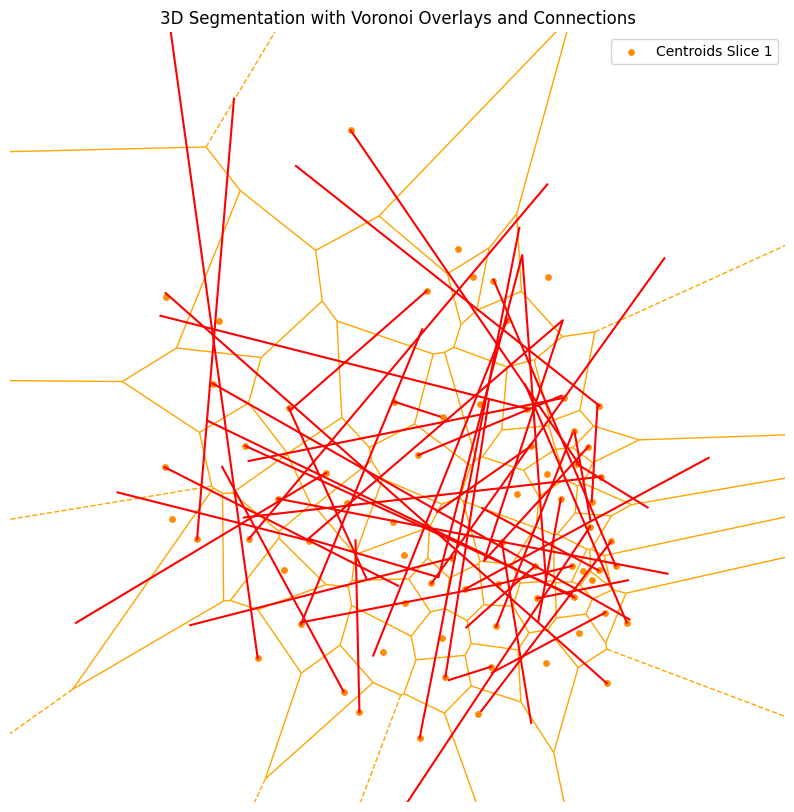

In [19]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Function to plot the Voronoi diagram and centroids for a given slice
def plot_voronoi_and_centroids(df_slice, ax, voronoi_color, centroid_color):
    centroids = df_slice[['centroid-1', 'centroid-0']].to_numpy()
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors=voronoi_color, line_width=1)
    ax.scatter(centroids[:, 0], centroids[:, 1], color=centroid_color, s=15, label=f'Centroids Slice {df_slice["slice"].iloc[0]}')

# Start the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Voronoi and centroids for each slice with the specified colors
plot_voronoi_and_centroids(df_all[df_all['slice'] == 1], ax, 'orange', 'darkorange')
# plot_voronoi_and_centroids(df_all[df_all['slice'] == 2], ax, 'green', 'darkgreen')
# plot_voronoi_and_centroids(df_all[df_all['slice'] == 3], ax, 'lightblue', 'blue')

# Draw lines connecting centroids with the same '3d_segmentation_label'
for label in df_all['3d_segmentation_label'].dropna().unique():
    centroids = df_all[df_all['3d_segmentation_label'] == label][['centroid-0', 'centroid-1', 'slice']]
    if len(centroids) > 1:
        centroids = centroids.sort_values('slice')
        ax.plot(centroids['centroid-1'], centroids['centroid-0'], color='red', linestyle='-', linewidth=1.5)

# Set axis limits to encompass all centroids
all_centroids = df_all[['centroid-1', 'centroid-0']].to_numpy()
ax.set_xlim(all_centroids[:, 1].min(), all_centroids[:, 1].max())
ax.set_ylim(all_centroids[:, 0].max(), all_centroids[:, 0].min())

# Set title and remove axes
ax.set_title('3D Segmentation with Voronoi Overlays and Connections')
plt.axis('off')
ax.legend()

# Show the plot
plt.show()


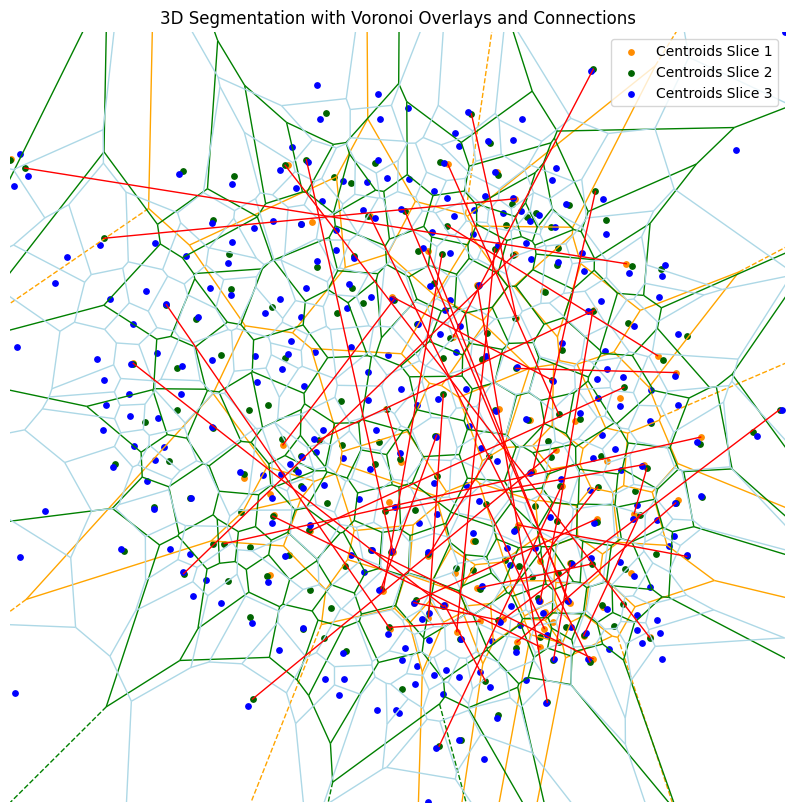

In [10]:
# Function to plot the Voronoi diagram and centroids for a given slice
def plot_voronoi_and_centroids(df_slice, ax, voronoi_color, centroid_color):
    # Extract the centroids
    centroids = df_slice[['centroid-0', 'centroid-1']].to_numpy()
    # Construct and plot the Voronoi diagram
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors=voronoi_color, line_width=1)
    # Plot the centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], color=centroid_color, s=15, label=f'Centroids Slice {df_slice["slice"].iloc[0]}')

# Start the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Voronoi and centroids for each slice with the specified colors
plot_voronoi_and_centroids(df_all[df_all['slice'] == 1], ax, 'orange', 'darkorange')
plot_voronoi_and_centroids(df_all[df_all['slice'] == 2], ax, 'green', 'darkgreen')
plot_voronoi_and_centroids(df_all[df_all['slice'] == 3], ax, 'lightblue', 'blue')

# Draw lines connecting centroids with the same '3d_segmentation_label'
for label in df_all['3d_segmentation_label'].unique():
    # Get all centroids with the same 3d_segmentation_label
    centroids = df_all[df_all['3d_segmentation_label'] == label][['centroid-0', 'centroid-1', 'slice']]
    if len(centroids['slice'].unique()) < 2:
        # Skip labels that are not in multiple slices
        continue
    
    # Sort centroids by slice to connect them in order
    centroids = centroids.sort_values('slice')
    ax.plot(centroids['centroid-0'], centroids['centroid-1'], color='red', linestyle='-', linewidth=1)

# Set axis limits to encompass all centroids
all_centroids = df_all[['centroid-0', 'centroid-1']].to_numpy()
ax.set_xlim(all_centroids[:, 0].min(), all_centroids[:, 0].max())
ax.set_ylim(all_centroids[:, 1].max(), all_centroids[:, 1].min())  # Inverted y-axis

# Set title and remove axes
ax.set_title('3D Segmentation with Voronoi Overlays and Connections')
plt.axis('off')
ax.legend()  # Add legend for centroids

# Show the plot
plt.show()


Veamos las distancias entre los elementos del mismo grupo

/tmp/ipykernel_5830/3212782218.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((centroid1[0] - centroid2[0])**2 + (centroid1[1] - centroid2[1])**2)
/tmp/ipykernel_5830/3212782218.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((centroid1[0] - centroid2[0])**2 + (centroid1[1] - centroid2[1])**2)
/tmp/ipykernel_5830/3212782218.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((cen

/tmp/ipykernel_5830/3212782218.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((centroid1[0] - centroid2[0])**2 + (centroid1[1] - centroid2[1])**2)
/tmp/ipykernel_5830/3212782218.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.sqrt((centroid1[0] - centroid2[0])**2 + (centroid1[1] - centroid2[1])**2)


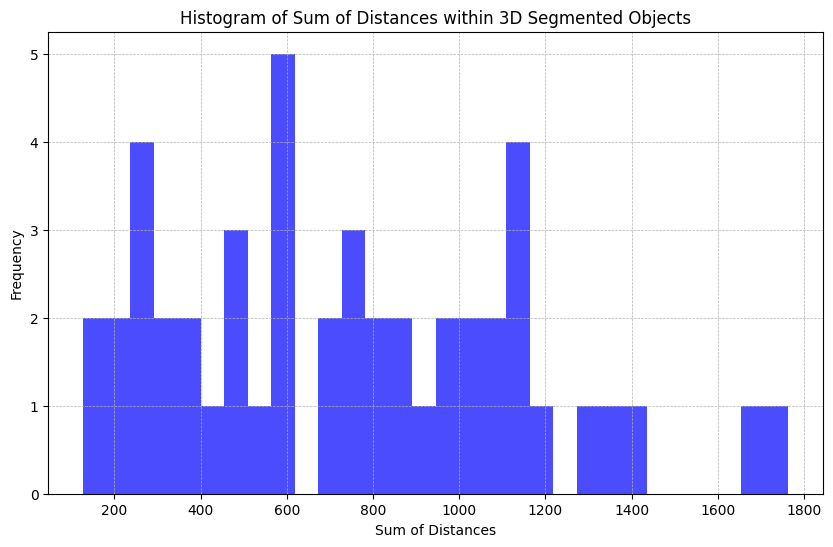

In [61]:
# Function to calculate the distance between two centroids
def calc_distance(centroid1, centroid2):
    return np.sqrt((centroid1[0] - centroid2[0])**2 + (centroid1[1] - centroid2[1])**2)

# Prepare a new DataFrame
data = []

# Group df_all by '3d_segmentation_label'
for label, group in df_all.groupby('3d_segmentation_label'):
    if len(group) > 1:
        # Calculate the sum of distances within the group
        distance_sum = 0
        for i in range(len(group) - 1):
            if group.iloc[i]['slice'] == 1 and group.iloc[i + 1]['slice'] == 2:
                distance_sum += calc_distance(group.iloc[i][['centroid-0', 'centroid-1']], 
                                              group.iloc[i + 1][['centroid-0', 'centroid-1']])
            elif group.iloc[i]['slice'] == 2 and group.iloc[i + 1]['slice'] == 3:
                distance_sum += calc_distance(group.iloc[i][['centroid-0', 'centroid-1']], 
                                              group.iloc[i + 1][['centroid-0', 'centroid-1']])
        
        # Append data
        data.append({'3d_segmentation_label': label, 'num_objects': len(group), 'distance_sum': distance_sum})

# Create new DataFrame
df_summary = pd.DataFrame(data)

# Plotting the histogram of distances
plt.figure(figsize=(10, 6))
plt.hist(df_summary['distance_sum'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Sum of Distances within 3D Segmented Objects')
plt.xlabel('Sum of Distances')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Clustering usando la fluorescencia total (con segmentación 3D)